# Prepare a classification model using Naive Bayes for salary data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset_Train = pd.read_csv("C:/Users/Prashant/Downloads/SalaryData_Train.csv")
dataset_Test = pd.read_csv("C:/Users/Prashant/Downloads/SalaryData_Test.csv")

In [4]:
dataset_Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
dataset_Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [7]:
#EDA

In [8]:
dataset_Train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
dataset_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
dataset_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [12]:
# Preprocessing the data to convert categorical variables into numarical variables
columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']
le=LabelEncoder()
for i in columns:
    dataset_Train[i]=le.fit_transform(dataset_Train[i])
    dataset_Test[i]=le.fit_transform(dataset_Test[i])

In [13]:
dataset_Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K


In [15]:
dataset_Train.corr()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
age,1.000000,0.080537,-0.001091,0.043525,-0.276363,-0.005682,-0.246452,0.023380,0.081972,0.080152,0.060278,0.101598,-0.001548
workclass,0.080537,1.000000,0.017864,0.037833,-0.034235,0.015572,-0.067414,0.044734,0.074966,0.035349,0.007244,0.050723,0.007598
education,-0.001091,0.017864,1.000000,0.345420,-0.040704,-0.038213,-0.012732,0.011139,-0.027831,0.030582,0.014822,0.059892,0.079715
educationno,0.043525,0.037833,0.345420,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006155,0.124416,0.079691,0.152522,0.092625
maritalstatus,-0.276363,-0.034235,-0.040704,-0.063419,1.000000,0.022655,0.177955,-0.068641,-0.119774,-0.042414,-0.035385,-0.189004,-0.026057
occupation,-0.005682,0.015572,-0.038213,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062316,0.022162,0.014612,0.018365,-0.003298
relationship,-0.246452,-0.067414,-0.012732,-0.091935,0.177955,-0.053727,1.000000,-0.117148,-0.584881,-0.058257,-0.063659,-0.257850,-0.010661
race,0.023380,0.044734,0.011139,0.032805,-0.068641,0.000717,-0.117148,1.000000,0.089207,0.014355,0.023461,0.048533,0.126507
sex,0.081972,0.074966,-0.027831,0.006155,-0.119774,0.062316,-0.584881,0.089207,1.000000,0.048809,0.047285,0.231272,0.000063
capitalgain,0.080152,0.035349,0.030582,0.124416,-0.042414,0.022162,-0.058257,0.014355,0.048809,1.000000,-0.032218,0.080431,0.008513


<AxesSubplot:xlabel='workclass', ylabel='count'>

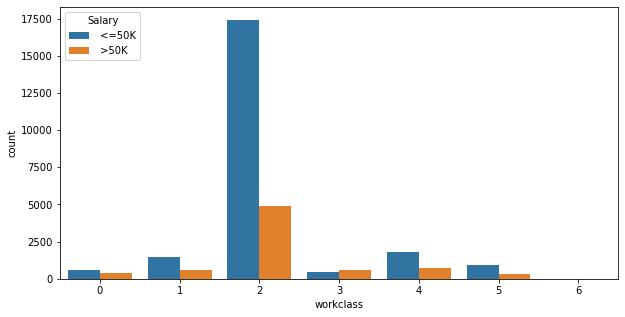

In [16]:
dims = (10,5)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(ax = ax, data=dataset_Train,x='workclass',hue='Salary',palette='tab10')

<AxesSubplot:xlabel='occupation', ylabel='count'>

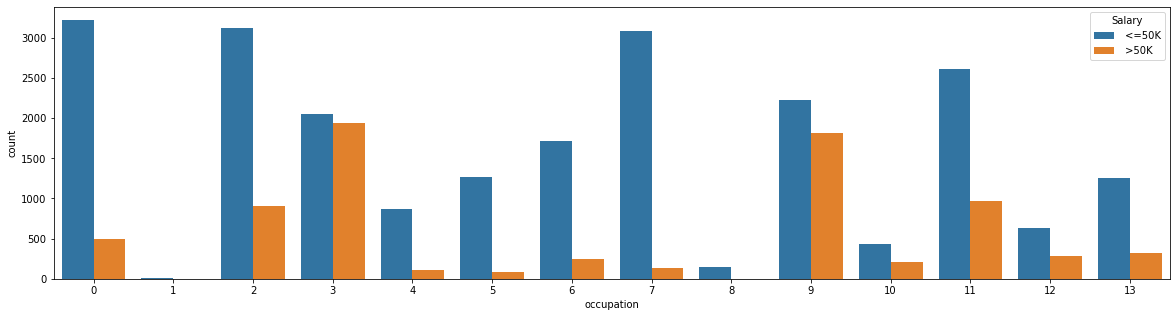

In [18]:
dims = (20,5)
fig, ax = plt.subplots(figsize=dims)
sns.countplot(data=dataset_Train,x='occupation',hue='Salary',palette='tab10')

In [19]:
dataset_Train.Salary.value_counts() #Data is highly biased

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [20]:
dataset_Train.occupation.value_counts()

9     4038
2     4030
3     3992
0     3721
11    3584
7     3212
6     1965
13    1572
5     1350
4      989
12     912
10     644
8      143
1        9
Name: occupation, dtype: int64

In [21]:
dataset_Test.occupation.value_counts()

3     1992
2     1990
9     1970
11    1824
0     1819
7     1596
6     1004
13     744
5      696
12     508
4      491
10     332
8       89
1        5
Name: occupation, dtype: int64

In [22]:
#Train and Test Split

In [23]:
# Splitting data into training and testing samples
x_train=dataset_Train.iloc[:,0:13]
y_train=dataset_Train.iloc[:,13]
x_test=dataset_Test.iloc[:,0:13]
y_test=dataset_Test.iloc[:,13]

In [24]:
#Naive Bayes Classifier

In [25]:
#MultinomialNB

In [26]:
from sklearn.naive_bayes import MultinomialNB as MB

In [27]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [28]:
# Using Multinomial Naive Bayes 
model_mb=MB()
model_mb.fit(x_train,y_train)
pred_mb=model_mb.predict(x_test)
pred_mb

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [29]:
accuracy_mb=np.mean(pred_mb==y_test)
accuracy_mb

0.7749667994687915

In [30]:
def report(model):
    preds = model.predict(x_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,x_test,y_test)

MultinomialNB
              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.87     11360
        >50K       0.62      0.21      0.32      3700

    accuracy                           0.77     15060
   macro avg       0.71      0.58      0.59     15060
weighted avg       0.75      0.77      0.73     15060



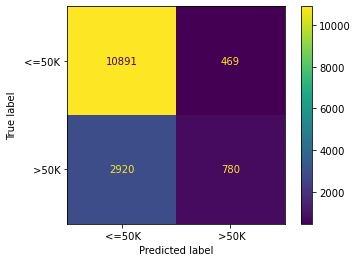

In [31]:
#MultinomialNB Evaluation
print('MultinomialNB')
report(model_mb) #model has high inbuilt bias

In [32]:
#GaussianNB

In [33]:
from sklearn.naive_bayes import GaussianNB as GB

In [34]:
# Using Gaussian naive Bayes
model_gb=GB()
model_gb.fit(x_train,y_train)
pred_gb=model_gb.predict(x_test)
pred_gb

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [35]:
accuracy_gb=np.mean(pred_gb==y_test)
accuracy_gb

0.7946879150066402

GaussianNB
              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87     11360
        >50K       0.67      0.33      0.44      3700

    accuracy                           0.79     15060
   macro avg       0.74      0.64      0.66     15060
weighted avg       0.78      0.79      0.77     15060



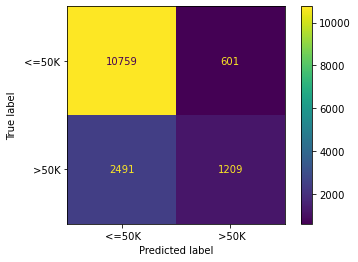

In [36]:
#GaussianNB Evaluation
print('GaussianNB')
report(model_gb)